# Uplift Modeling X5

–í –¥–∞–Ω–æ–π —Ä–∞–±–æ—Ç–µ —è –ø–æ–ø—ã—Ç–∞–ª—Å—è —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É uplift –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∞ [–¥–∞–Ω–Ω—ã—Ö X5](https://www.kaggle.com/competitions/2021-uplift-modeling/data) –ø–æ –ø–æ–∏—Å–∫—É –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —Å–æ–≤–µ—Ä—à–∏–ª–∏ –±—ã target –±–µ–∑ –ø–æ–ª—É—á–µ–Ω–∏—è –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ treatment. –í –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∞ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è –∫–ª–∞—Å—Å–æ–≤.

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm.notebook import tqdm
import seaborn as sns

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [2]:
warnings.filterwarnings('ignore')

–ü–µ—Ä–≤—ã–π —Ñ–∞–π–ª —Å–æ–¥–µ—Ä–∂–∏—Ç –≤ —Å–µ–±–µ –æ–±—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –∫–ª–∏–µ–Ω—Ç–∞—Ö

In [3]:
client_data = pd.read_csv('datasets/x5_uplift/clients2.csv')
client_data = client_data.drop('client_id.1', axis=1)
client_data.head(3)

client_id     first_issue_date    first_redeem_date  age gender
0  000012768d  2017-08-05 15:40:48  2018-01-04 19:30:07   45      U
1  000036f903  2017-04-10 13:54:23  2017-04-23 12:37:56   72      F
2  00010925a5  2018-07-24 16:21:29  2018-09-14 16:12:49   83      U

–í—Ç–æ—Ä–æ–π —Ñ–∞–π–ª —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ target –∫–ª–∏–µ–Ω—Ç–∞ –∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–∏ —Å –Ω–∏–º

In [4]:
train_data = pd.read_csv('datasets/x5_uplift/train.csv')
train_data.head(3)

client_id  treatment_flg  target
0  ad6561e2d8              1       1
1  7c1ccbf93f              1       1
2  b58fadcab6              1       1

–¢–µ—Å—Ç–æ–≤—ã–π —Ñ–∞–π–ª —Å–æ–¥–µ—Ä–∂–∏—Ç –≤ —Å–µ–±–µ id –∫–ª–∏–µ–Ω—Ç–æ–≤, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å —Å–æ–≤–µ—Ä—à–∏—Ç –ª–∏ –æ–Ω –ø–æ–∫—É–ø–∫—É —Ç–æ–ª—å–∫–æ —Å —Ç—Ä–∏—Ç–º–µ–Ω—Ç–æ–º 

In [5]:
test_data = pd.read_csv('datasets/x5_uplift/test.csv')
test_data.head(3)

client_id
0  a9a604ed6e
1  ebd7360016
2  908cd9b8e8

–ü–æ—Å–æ–ª–µ–¥–Ω–∏–µ –¥–≤–∞ —Ñ–∞–π–ª–∞ —Å–æ–¥–µ—Ä–∂–∞—Ç –∏–Ω—Ñ—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –±–æ–ª—å—à–∏–µ –ø–æ —Ä–∞–∑–º–µ—Ä—É, —Ç–æ —Å—Ä–∞–∑—É –∑–∞–≥—Ä—É–∑–∏–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∏–∑ –∏—Ö –∫–æ–ª–æ–Ω–æ–∫ –≤ –±–æ–ª–µ–µ –ª–µ–≥–∫–æ–º —Ñ–æ—Ä–º–∞—Ç–µ.

In [6]:
train_punch = \
pd.read_csv('datasets/x5_uplift/train_purch.csv',
           dtype={'express_points_received': np.int32,\
                 'regular_points_spent': np.int32,\
                 'express_points_spent': np.int32,
                 'product_quantity': np.int32},\
           parse_dates=['transaction_datetime'])
train_punch.head()

client_id transaction_id transaction_datetime  regular_points_received  \
0  000012768d     7e3e2e3984  2018-12-01 07:12:45                     10.0   
1  000012768d     7e3e2e3984  2018-12-01 07:12:45                     10.0   
2  000012768d     7e3e2e3984  2018-12-01 07:12:45                     10.0   
3  000012768d     7e3e2e3984  2018-12-01 07:12:45                     10.0   
4  000012768d     7e3e2e3984  2018-12-01 07:12:45                     10.0   

   express_points_received  regular_points_spent  express_points_spent  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   

   purchase_sum    store_id  product_id  product_quantity  trn_sum_from_iss  \
0        1007.0  54a4a11a29  9a80204f78                 2              80.0   
1        1007.0  54a4a11a29  da89ebd374                 1              65.0   
2        1007.0  54a4a11a29  0a95e1151d                 1              24.0   
3        1007.0  54a4a11a29  4055b15e4a                 2              50.0   
4        1007.0  54a4a11a29  a685f1916b                 1              22.0   

   trn_sum_from_red  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [7]:
transaction_date = train_punch[['transaction_id', 'transaction_datetime']].copy()

In [8]:
numeric_columns = ['regular_points_received', 'express_points_received', 'regular_points_spent', \
                   'express_points_spent', 'purchase_sum']

In [9]:
train_punch.drop(['transaction_datetime', 'store_id', 'product_id', \
                  'trn_sum_from_red', 'product_quantity', 'trn_sum_from_iss'], axis=1, inplace=True)

In [10]:
train_punch = train_punch.groupby(['client_id', 'transaction_id'])[numeric_columns].mean().reset_index()
train_punch.head(3)

client_id transaction_id  regular_points_received  \
0  000012768d     6a0e96d0bc                      8.0   
1  000012768d     7e3e2e3984                     10.0   
2  000012768d     b34f23306e                      2.0   

   express_points_received  regular_points_spent  express_points_spent  \
0                      0.0                   0.0                   0.0   
1                      0.0                   0.0                   0.0   
2                      0.0                   0.0                   0.0   

   purchase_sum  
0         803.0  
1        1007.0  
2         419.0

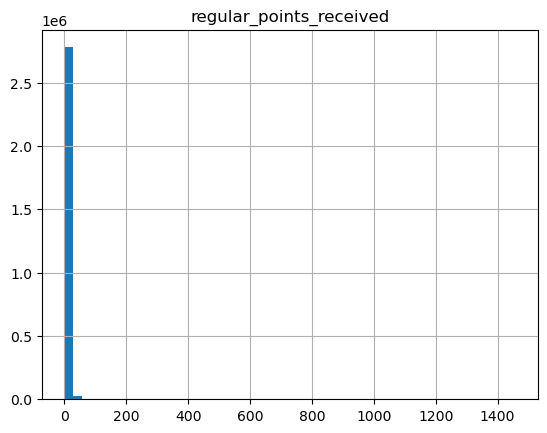

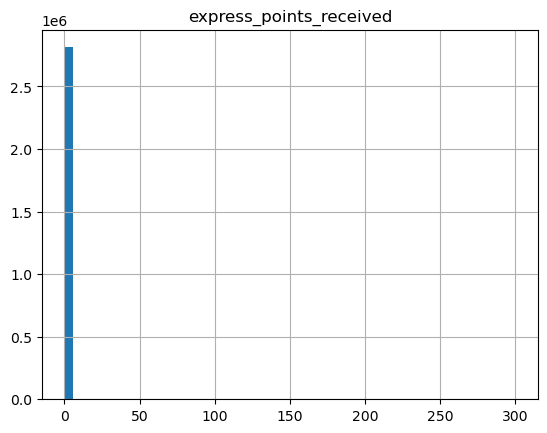

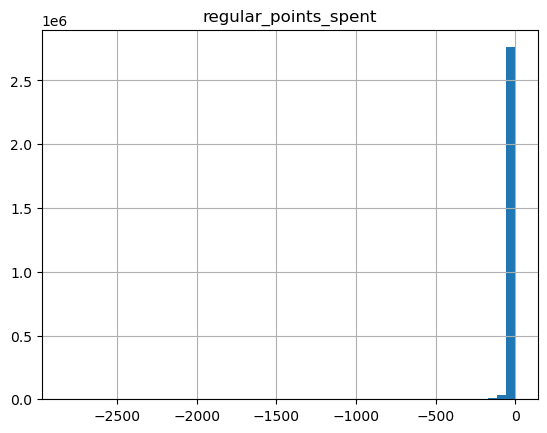

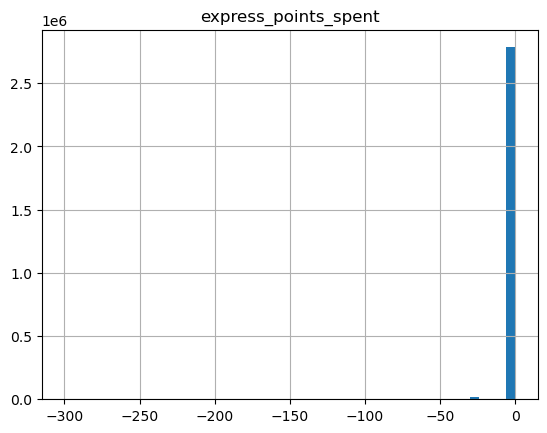

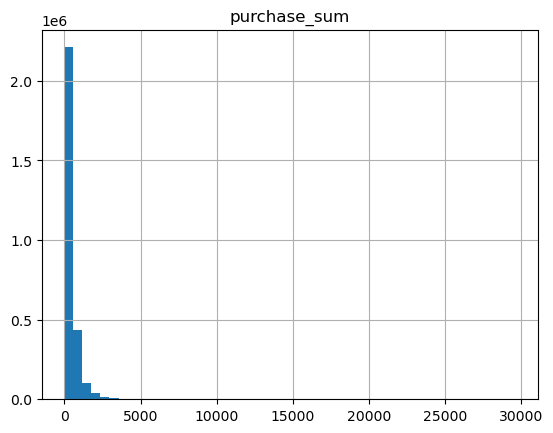

In [11]:
for col in numeric_columns:
    train_punch[col].hist(bins=50)
    plt.title(col)
    plt.show()

–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∫–∞–∂—É—Ç—Å—è –±—É–¥—Ç–æ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏, –æ–¥–Ω–∞–∫–æ —ç—Ç–æ –Ω–µ —Ç–∞–∫, –ø–æ—Ç–æ–º—É —á—Ç–æ –ø–æ—Ç—Ä–∞—Ç–∏—Ç—å 2000 –±–∞–ª–ª–æ–≤ –∑–∞ –ø–æ–∫—É–ø–∫—É –≤–ø–æ–ª–Ω–µ —Ä–µ–∞–ª—å–Ω–æ, –º–Ω–æ–≥–æ –ø–æ–∫—É–ø–æ–∫ –±–µ–∑ —Å–ø–∏—Å–∞–Ω–∏—è –±–∞–ª–ª–æ–≤, —Ç–∞–∫ –∫–∞–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø—Ä–æ—Å—Ç–æ –∫–æ–ø—è—Ç –±–∞–ª–ª—ã.

In [12]:
train_punch = train_punch.merge(transaction_date, on='transaction_id', how='left')

In [13]:
max_date = train_punch['transaction_datetime'].max()
unactive_days = (max_date - train_punch['transaction_datetime']).dt.days
client_unactivity = pd.DataFrame(train_punch['client_id']).join(pd.DataFrame(unactive_days))
client_unactivity = client_unactivity.groupby('client_id')['transaction_datetime'].max().\
reset_index()
client_unactivity = client_unactivity.rename(columns={'transaction_datetime':'unactive_days'})

In [14]:
train_punch.drop(['transaction_id', 'transaction_datetime'], axis=1, inplace=True)
train_punch = train_punch.groupby('client_id')[numeric_columns].sum().reset_index()
train_punch = train_punch.merge(client_unactivity, on='client_id')
train_punch.head()

client_id  regular_points_received  express_points_received  \
0  000012768d                    392.7                      0.0   
1  000036f903                    348.3                    360.0   
2  0001f552b0                    552.2                      0.0   
3  00020e7b18                   6088.0                      0.0   
4  000220a0a7                    896.6                      0.0   

   regular_points_spent  express_points_spent  purchase_sum  unactive_days  
0                   0.0                   0.0      40809.00            107  
1                   0.0                   0.0      58765.00            110  
2                   0.0                   0.0      47974.34            114  
3               -2674.0                -330.0     558970.46            115  
4                   0.0                   0.0      69487.58             97

In [15]:
test_punch = \
pd.read_csv('datasets/x5_uplift/test_purch.csv',
           dtype={'express_points_received': np.int32,\
                 'regular_points_spent': np.int32,\
                 'express_points_spent': np.int32,
                 'product_quantity': np.int32},
           parse_dates=['transaction_datetime'])

In [16]:
test_transaction_date = test_punch[['transaction_datetime', 'transaction_id']].copy()

In [17]:
test_punch.drop(['transaction_datetime', 'store_id', 'product_id', \
                  'trn_sum_from_red', 'product_quantity', 'trn_sum_from_iss'], axis=1, \
                inplace=True)

In [18]:
test_punch = test_punch.groupby(['client_id', 'transaction_id'])\
[numeric_columns].mean().reset_index()

In [19]:
test_punch = test_punch.merge(test_transaction_date, on='transaction_id', how='left')

In [20]:
max_date_test = test_punch['transaction_datetime'].max()
unactive_days_test = (max_date_test - test_punch['transaction_datetime']).dt.days
client_unactivity_test = pd.DataFrame(test_punch['client_id']).\
join(pd.DataFrame(unactive_days_test))
client_unactivity_test = client_unactivity_test.\
groupby('client_id')['transaction_datetime'].max().reset_index()
client_unactivity_test = client_unactivity_test.rename\
(columns={'transaction_datetime':'unactive_days'})

In [21]:
test_punch = test_punch.groupby('client_id')[numeric_columns].sum().reset_index()
test_punch = test_punch.merge(client_unactivity_test, on='client_id')
test_punch.head(3)

client_id  regular_points_received  express_points_received  \
0  00010925a5                    163.0                      0.0   
1  00035a21d9                    259.2                      0.0   
2  00038f9200                    351.7                      0.0   

   regular_points_spent  express_points_spent  purchase_sum  unactive_days  
0                 -85.0                   0.0      28494.00            113  
1                -104.0                -390.0      17545.52             37  
2                 -87.0                   0.0      37684.00            101

–ù–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É—é—Ç —Ç–æ–ª—å–∫–æ –∫–ª–∏–µ–Ω—Ç—ã:
1) –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —Å–æ–≤–µ—Ä—à–∏–ª–∏ –ø–æ–∫—É–ø–∫—É –∏ –ø—Ä–∏ —ç—Ç–æ–º –Ω–∞ –Ω–∏—Ö –±—ã–ª –Ω—É–ª–µ–≤–æ–π treatment
2) –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–≤–µ—Ä—à–∏–ª–∏ –ø–æ–∫—É–ø–∫—É –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ treatment

–ù–∏–∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è –∫–ª–∞—Å—Å–æ–≤ –¥–ª—è –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏.

![Class Transformation](https://habrastorage.org/r/w1560/webt/d0/l7/kb/d0l7kb2vkvvzdrcnnqq-gihfqgu.png)

In [22]:
train_df = train_data.merge(client_data, on='client_id', how='left')
train_df = train_df.merge(train_punch, on='client_id', how='left')
train_df.drop('client_id', axis=1, inplace=True)
train_df['gender'] = train_df['gender'].apply(lambda x: 1 if x =='F' else 0)
train_df['first_issue_date'] = pd.to_datetime(train_df['first_issue_date'])
train_df['first_redeem_date'] = pd.to_datetime(train_df['first_redeem_date'])
train_df['first_issue_month'] = train_df['first_issue_date'].dt.month
train_df['first_issue_year'] = train_df['first_issue_date'].dt.year
train_df['first_issue_year'] = train_df['first_issue_year'] - train_df['first_issue_year'].min()
# —Ç–æ –∂–µ —Å–∞–º–æ–µ —Å first_redeem_date
train_df['first_redeem_month'] = train_df['first_redeem_date'].dt.month
train_df['first_redeem_year'] = train_df['first_redeem_date'].dt.year
train_df['first_redeem_year'] = train_df['first_redeem_year'] - train_df['first_redeem_year'].min()
# class transformation target
train_df['bought'] = train_df['target'] * train_df['treatment_flg'] + \
(1 - train_df['target']) * (1 - train_df['treatment_flg'])
train_df['bought'] = train_df['bought'].apply(lambda x: 1 if x == 1 else 0)

train_df = train_df.drop(['first_issue_date', 'first_redeem_date', 'target', 'treatment_flg'], axis=1)

train_df.head(3)

age  gender  regular_points_received  express_points_received  \
0   50       1                    729.0                      0.0   
1   24       1                     96.2                      0.0   
2   36       0                    757.5                      0.0   

   regular_points_spent  express_points_spent  purchase_sum  unactive_days  \
0                -576.0                   0.0      78849.40            115   
1                   0.0                   0.0       7833.00             27   
2               -2781.0                   0.0     114288.48            116   

   first_issue_month  first_issue_year  first_redeem_month  first_redeem_year  \
0                 12                 0                 5.0                1.0   
1                 11                 0                 2.0                1.0   
2                 11                 0                 9.0                1.0   

   bought  
0       1  
1       1  
2       1

In [23]:
train_df.dropna(inplace=True)
train_df.describe()

age         gender  regular_points_received  \
count  127673.000000  127673.000000            127673.000000   
mean       46.524872       0.374903               970.110759   
std        55.493654       0.484100              1906.658270   
min     -7491.000000       0.000000                 0.000000   
25%        34.000000       0.000000               156.900000   
50%        46.000000       0.000000               416.800000   
75%        59.000000       1.000000              1016.000000   
max      1852.000000       1.000000             97040.600000   

       express_points_received  regular_points_spent  express_points_spent  \
count            127673.000000         127673.000000         127673.000000   
mean                  7.819547           -662.330211            -39.661949   
std                 115.950475           1960.469945            124.430296   
min                   0.000000        -126989.000000          -9210.000000   
25%                   0.000000           -558.000000              0.000000   
50%                   0.000000           -110.000000              0.000000   
75%                   0.000000              0.000000              0.000000   
max               11100.000000              0.000000              0.000000   

       purchase_sum  unactive_days  first_issue_month  first_issue_year  \
count  1.276730e+05  127673.000000      127673.000000     127673.000000   
mean   9.377220e+04      99.432934           7.144322          0.436819   
std    1.660606e+05      24.844875           3.140391          0.594865   
min    3.870000e+00       3.000000           1.000000          0.000000   
25%    2.061536e+04      96.000000           5.000000          0.000000   
50%    4.730692e+04     110.000000           7.000000          0.000000   
75%    1.023496e+05     115.000000          10.000000          1.000000   
max    9.315100e+06     117.000000          12.000000          2.000000   

       first_redeem_month  first_redeem_year         bought  
count       127673.000000      127673.000000  127673.000000  
mean             6.662818           0.969774       0.517580  
std              3.693947           0.731864       0.499693  
min              1.000000           0.000000       0.000000  
25%              3.000000           0.000000       0.000000  
50%              7.000000           1.000000       1.000000  
75%             10.000000           2.000000       1.000000  
max             12.000000           2.000000       1.000000

In [24]:
test_df = test_data.merge(client_data, on='client_id', how='left')
test_df = test_df.merge(test_punch, on='client_id', how='left')
test_df.drop('client_id', axis=1, inplace=True)
test_df['gender'] = test_df['gender'].apply(lambda x: 1 if x =='F' else 0)
test_df['first_issue_date'] = pd.to_datetime(test_df['first_issue_date'])
test_df['first_redeem_date'] = pd.to_datetime(test_df['first_redeem_date'])
test_df['first_issue_month'] = test_df['first_issue_date'].dt.month
test_df['first_issue_year'] = test_df['first_issue_date'].dt.year
# —Ç–æ –∂–µ —Å–∞–º–æ–µ —Å first_redeem_date
test_df['first_redeem_month'] = test_df['first_redeem_date'].dt.month
test_df['first_redeem_year'] = test_df['first_redeem_date'].dt.year

test_df = test_df.drop(['first_issue_date', 'first_redeem_date'], axis=1)

test_df.head(3)

age  gender  regular_points_received  express_points_received  \
0   36       1                    466.8                      0.0   
1   63       1                    173.3                      0.0   
2   49       1                    219.1                      0.0   

   regular_points_spent  express_points_spent  purchase_sum  unactive_days  \
0                   0.0                   0.0      33702.70             98   
1                 -45.0                   0.0      24998.71            115   
2                -179.0                   0.0      37147.95            114   

   first_issue_month  first_issue_year  first_redeem_month  first_redeem_year  
0                  9              2018                 NaN                NaN  
1                  7              2017                 9.0             2017.0  
2                  3              2018                 7.0             2018.0

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60012 entries, 0 to 60011
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      60012 non-null  int64  
 1   gender                   60012 non-null  int64  
 2   regular_points_received  60012 non-null  float64
 3   express_points_received  60012 non-null  float64
 4   regular_points_spent     60012 non-null  float64
 5   express_points_spent     60012 non-null  float64
 6   purchase_sum             60012 non-null  float64
 7   unactive_days            60012 non-null  int64  
 8   first_issue_month        60012 non-null  int64  
 9   first_issue_year         60012 non-null  int64  
 10  first_redeem_month       54820 non-null  float64
 11  first_redeem_year        54820 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 6.0 MB


In [26]:
test_df.loc[test_df['first_redeem_year'].isna(), 'first_redeem_year'] = \
test_df.loc[~test_df['first_redeem_year'].isna(), 'first_redeem_year'].mean()
test_df.loc[test_df['first_redeem_month'].isna(), 'first_redeem_month'] = \
test_df.loc[~test_df['first_redeem_month'].isna(), 'first_redeem_month'].mean()
test_df.loc[(test_df['age'] <= 0) | (test_df['age'] >= 90), 'age'] = \
test_df.loc[(test_df['age'] > 0) & (test_df['age'] < 90), 'age'].mean()

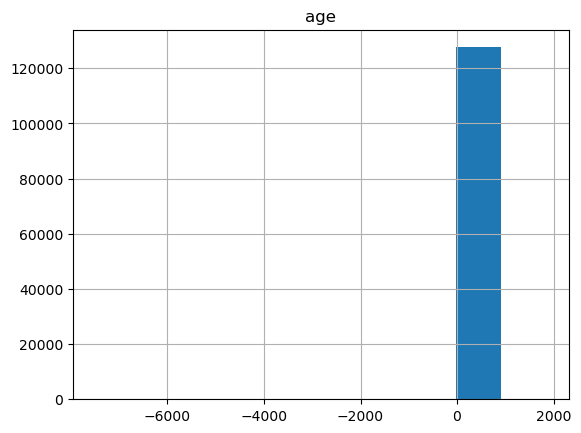

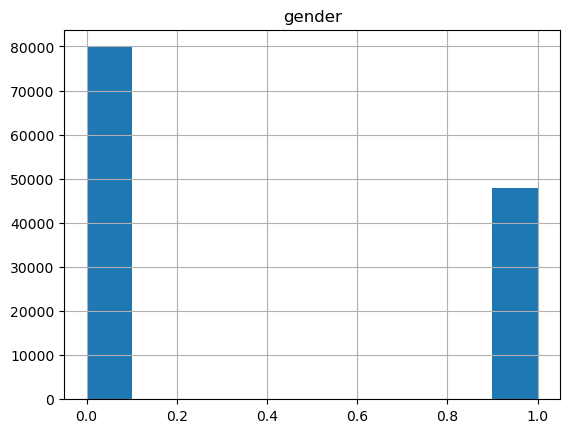

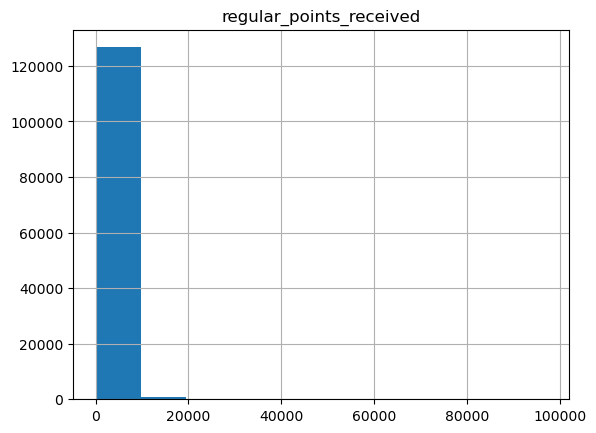

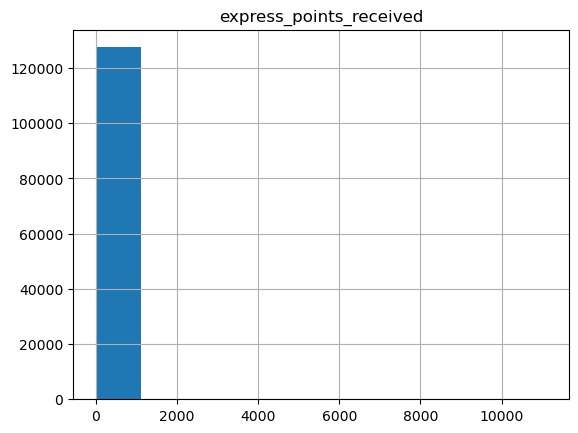

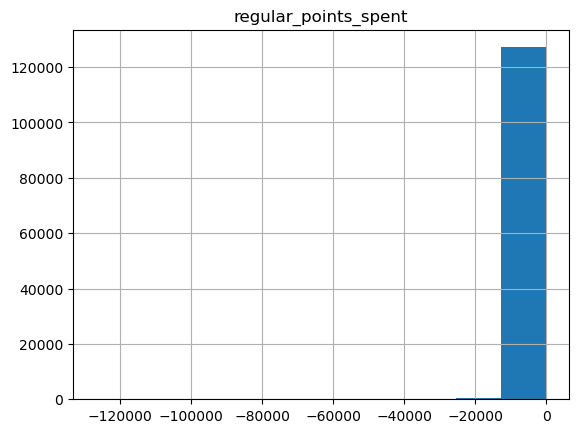

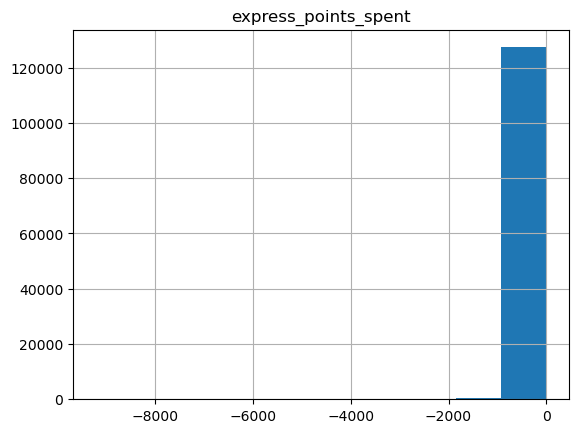

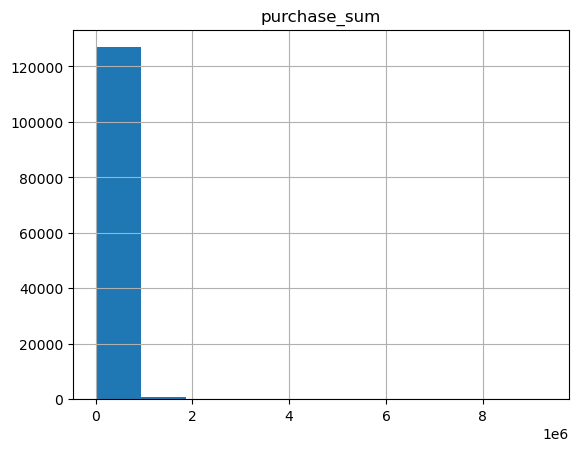

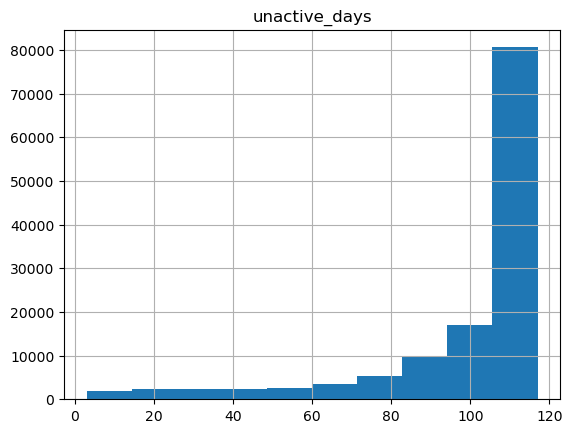

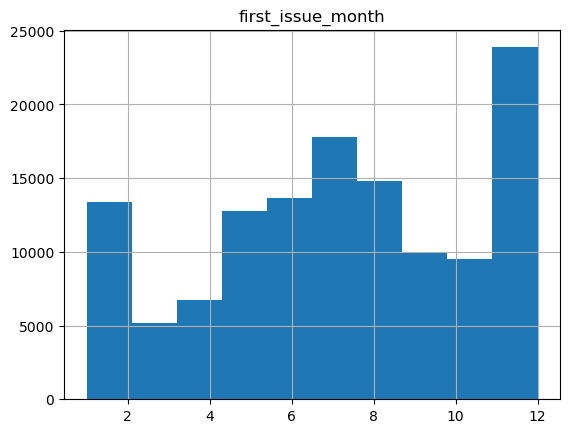

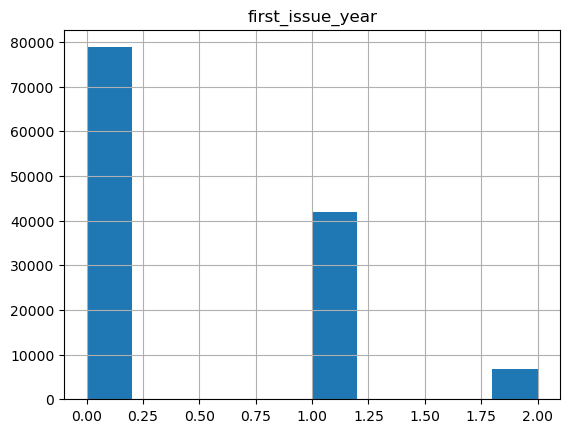

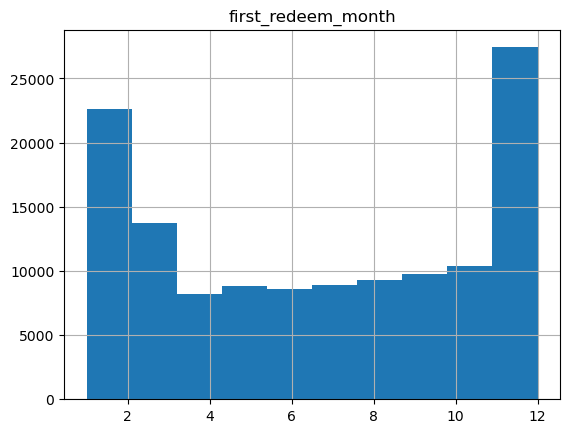

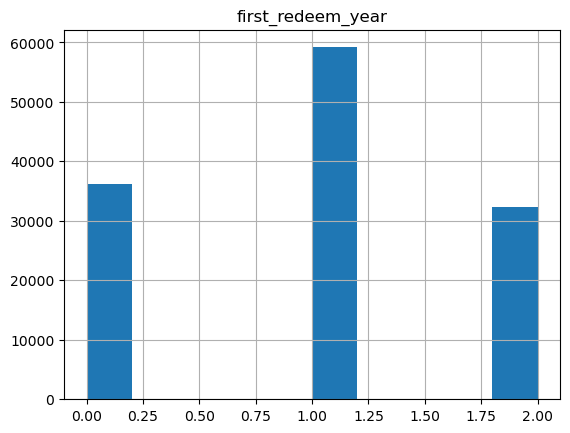

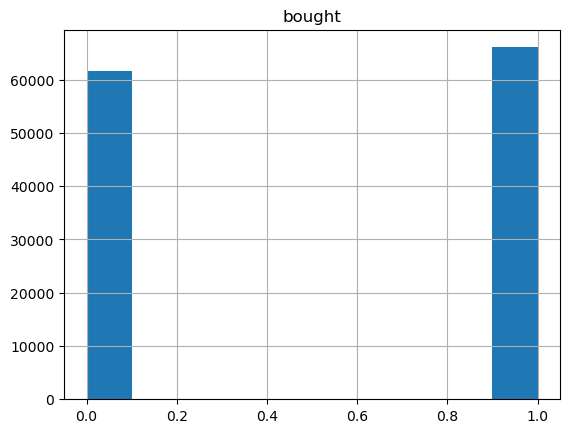

In [27]:
for col in train_df.columns:
    train_df[col].hist()
    plt.title(col)
    plt.show()

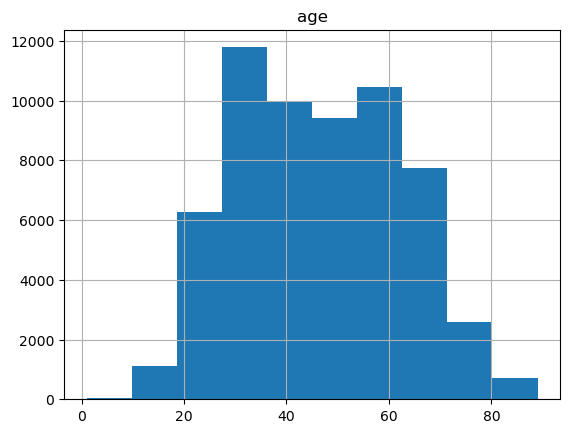

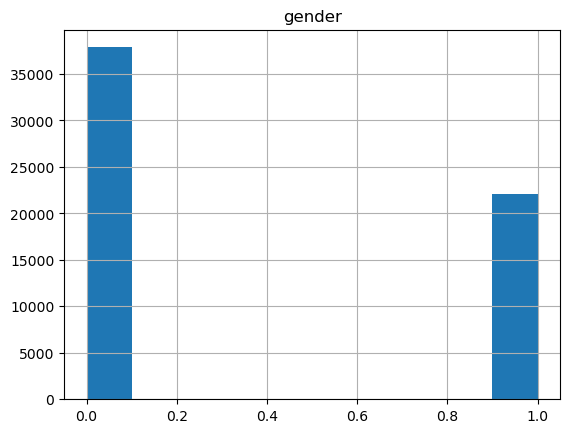

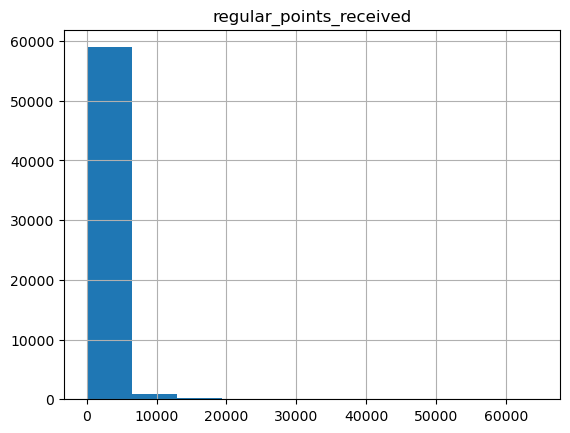

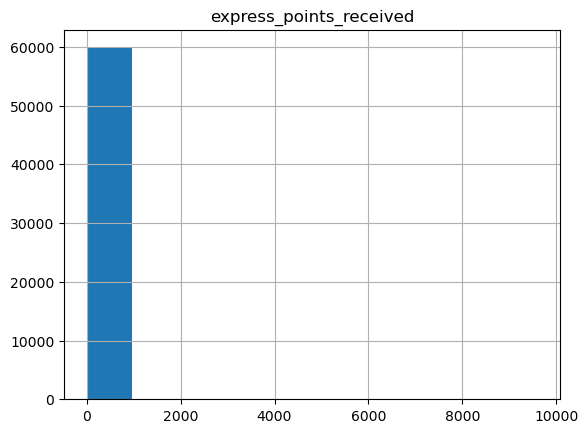

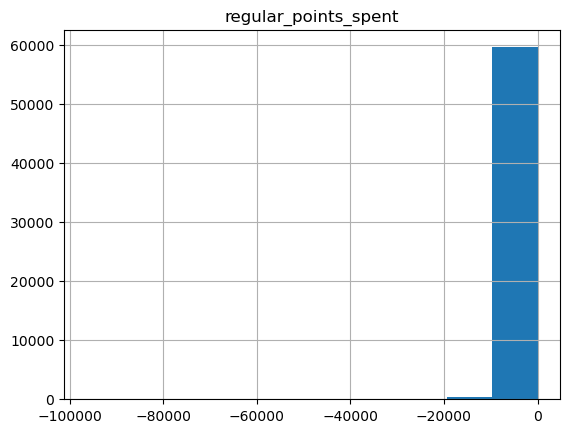

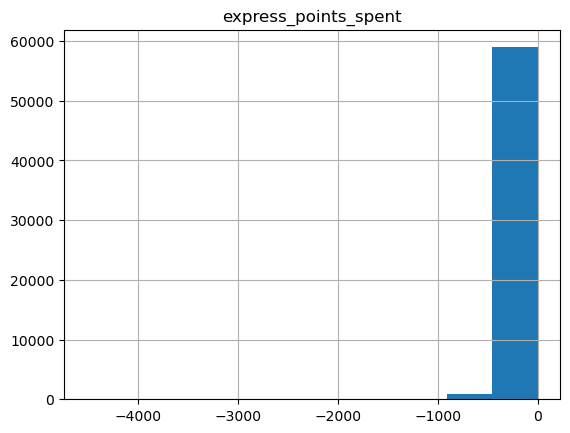

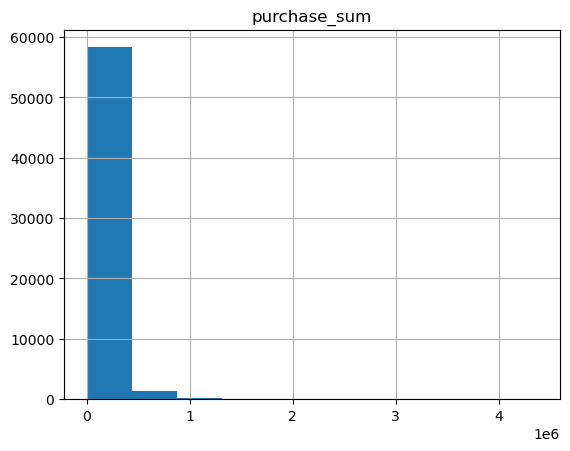

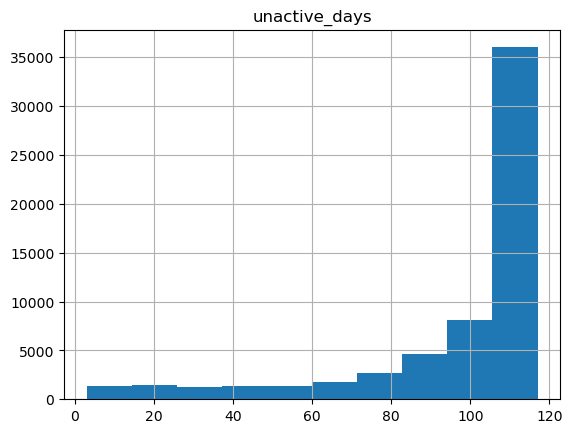

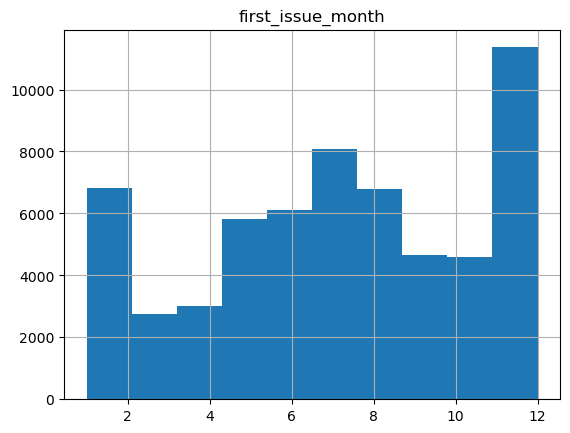

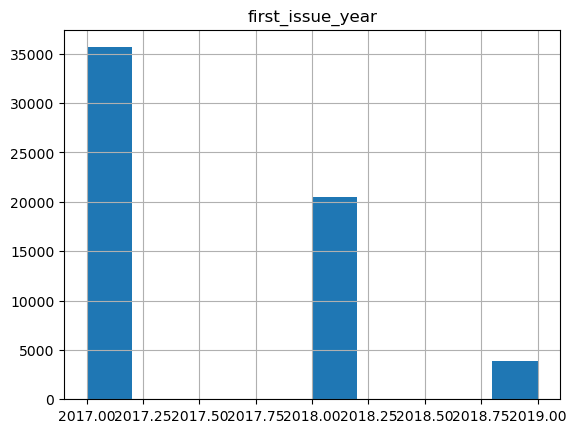

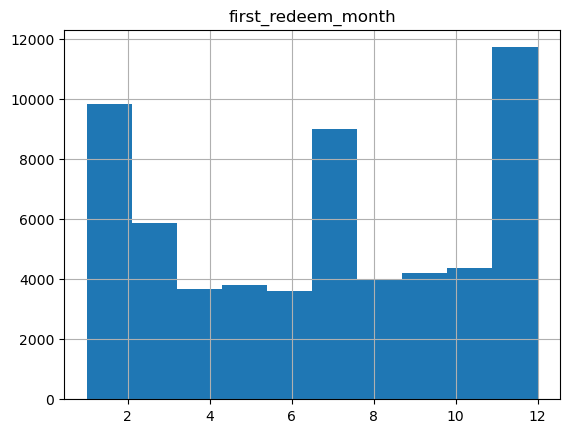

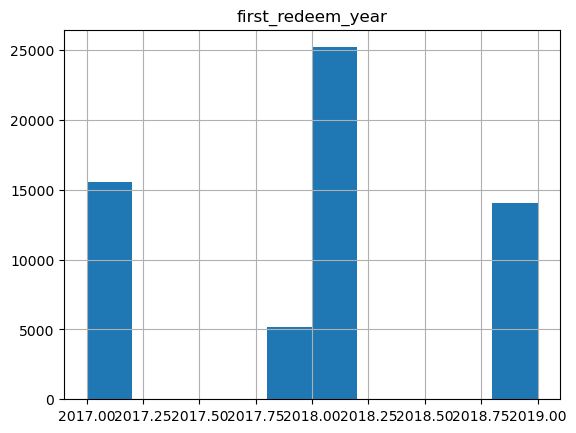

In [28]:
for col in test_df.columns:
    test_df[col].hist()
    plt.title(col)
    plt.show()

In [29]:
train_df = train_df[(train_df['age'] > 0) & (train_df['age'] < 90)]

<AxesSubplot: >

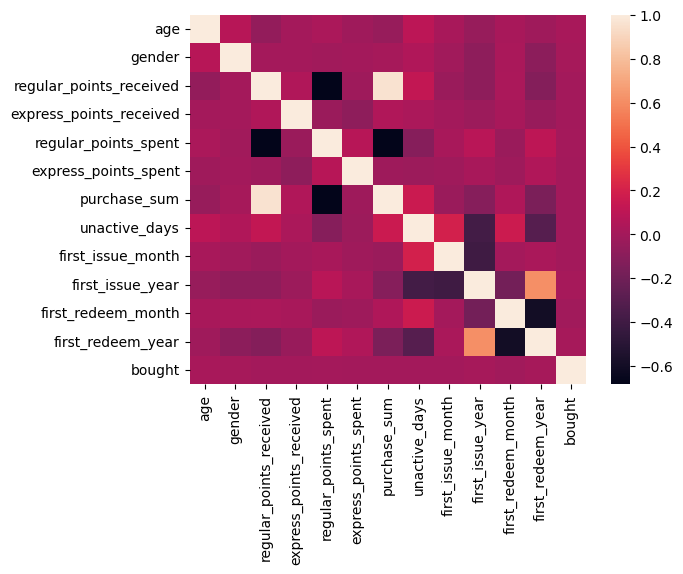

In [30]:
sns.heatmap(train_df.corr(), )

–í–∏–¥–∏–º —Å–∏–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –ø–æ–∫—É–ø–∫–∏ –∏ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω—ã—Ö –±–∞–ª–ª–æ–≤. –ù–æ –º—ã –Ω–µ –±—É–¥–µ–º —Å—Ç—Ä–æ–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, –ø–æ—ç—Ç–æ–º—É –¥–∞–Ω–Ω–∞—è –ø—Ä–æ–±–ª–µ–º–∞ –Ω–µ –ø–æ–º–µ—à–∞–µ—Ç –æ—à–∏–±–∫–æ–π –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏.

## Train

In [31]:
X_train, X_val, y_train, y_val = \
train_test_split(train_df.drop('bought', axis=1), train_df['bought'], test_size=0.2)

### CatBoost üêà 

In [32]:
cat = CatBoostClassifier(iterations=1000, verbose=False)
cat.fit(X_train, y_train)

In [33]:
2 * roc_auc_score(y_val, cat.predict_proba(X_val)[:, 1]) - 1

0.04131690986283765

### XGBoost

In [34]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [35]:
2 * roc_auc_score(y_val, xgb.predict_proba(X_val)[:, 1]) - 1

0.038059038325223504

### Random Forest

In [36]:
forest = RandomForestClassifier(n_estimators=300, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [37]:
2 * roc_auc_score(y_val, forest.predict_proba(X_val)[:, 1]) - 1

0.02911414069614504

–õ—É—à–µ–π –º–æ–¥–µ–ª—å—é –æ–∫–∞–∑–∞–ª—Å—è catboost, –¥–∞—é—â–∏–π gini = 0.041. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –Ω–µ–π

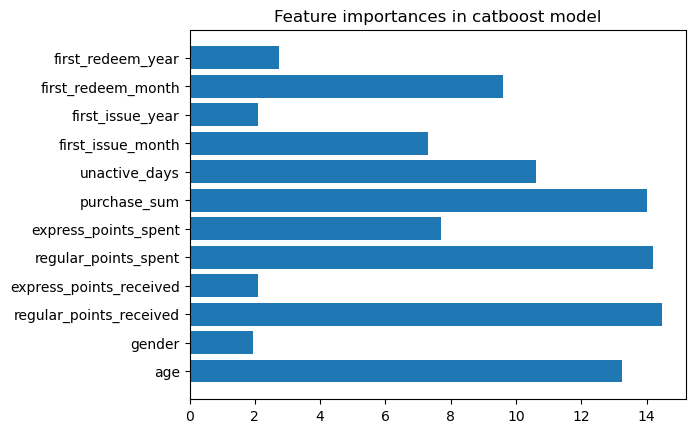

In [38]:
plt.barh(test_df.columns, width=cat.get_feature_importance())
plt.title('Feature importances in catboost model')
plt.show()

### Predictions

In [39]:
test_data['pred'] = cat.predict_proba(test_df)[:, 1]
test_data.to_csv('Downloads/x5_uplift_submission.csv', index=False)

### –í—ã–≤–æ–¥

–í –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞ –∑–∞–¥–∞—á–∞ uplift –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∫–ª–∞—Å—Å–æ–≤. –ë—ã–ª–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç—ã –¥–∞–Ω–Ω—ã–µ, —Å–æ–∑–¥–∞–Ω—ã –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –ø–æ–≤–ª–∏—è–≤—à–∏–µ –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π. –õ—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –æ–∫–∞–∑–∞–ª—Å—è catboost, –¥–∞—é—â–∏–π –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã–π gini = 0.041.